In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitute combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#Create a practice set of random latitude and longitude combinations
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x,y)
#coordinates

In [5]:
#Use the Tuple() function to display the latitude and longitude combination
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [8]:
#Import the requests library
import requests

#Import the API Key
from config import weather_api_key

In [9]:
#Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kabanjahe
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | teguldet
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | lalibela
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | severo-yeniseyskiy
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | xinzhou
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | victor harbor
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 21 of Set 1 | kavaratti
Processin

Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | herat
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | kharan
Processing Record 42 of Set 4 | formosa
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | kingisepp
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | kunming
Processing Record 47 of Set 4 | rudnogorsk
Processing Record 48 of Set 4 | balakhta
Processing Record 49 of Set 4 | emba
Processing Record 50 of Set 4 | vao
Processing Record 1 of Set 5 | kailua
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | ossora
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | ugoofaaru
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | meulaboh
Processing Record 8 of Set 5 | pochutla
Processing Record 9 of Set 5 | rock springs
Processing Record 10 of Set 5 | berlevag
Processing Record 11 of Set 5 | waipawa
Processing Record 12 of Set 5 | moyale
Pro

Processing Record 26 of Set 8 | vilyuysk
Processing Record 27 of Set 8 | mollendo
Processing Record 28 of Set 8 | maneadero
Processing Record 29 of Set 8 | ulladulla
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | college
Processing Record 33 of Set 8 | lagoa
Processing Record 34 of Set 8 | mersing
Processing Record 35 of Set 8 | nicoya
Processing Record 36 of Set 8 | gander
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | almaznyy
Processing Record 39 of Set 8 | sambava
Processing Record 40 of Set 8 | aconibe
Processing Record 41 of Set 8 | yomitan
City not found. Skipping...
Processing Record 42 of Set 8 | banyo
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | manokwari
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | nizwa
Processing Record 48 of Set 8 | north bend
Processing Record 49 of Set 8 | ri

Processing Record 13 of Set 12 | gualeguay
Processing Record 14 of Set 12 | pizarro
Processing Record 15 of Set 12 | matadi
Processing Record 16 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 17 of Set 12 | safaga
Processing Record 18 of Set 12 | airai
Processing Record 19 of Set 12 | hong gai
Processing Record 20 of Set 12 | lola
Processing Record 21 of Set 12 | tena
Processing Record 22 of Set 12 | roma
Processing Record 23 of Set 12 | saravena
Processing Record 24 of Set 12 | banjar
Processing Record 25 of Set 12 | byron bay
Processing Record 26 of Set 12 | cihuatlan
Processing Record 27 of Set 12 | qasigiannguit
Processing Record 28 of Set 12 | forbes
Processing Record 29 of Set 12 | krasnyy
Processing Record 30 of Set 12 | bairiki
Processing Record 31 of Set 12 | fomboni
Processing Record 32 of Set 12 | paka
Processing Record 33 of Set 12 | eureka
Processing Record 34 of Set 12 | andrews
Processing Record 35 of Set 12 | joshimath
Processing Record 36 of Set 12

In [12]:
#Loop through all the cities in our list
#for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
        
    #Create endpoint URL with each city
    #city_url = url + "%q=" + cities[i]

In [13]:
len(city_data)

572

In [14]:
#Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,55.09,66,77,18.95,AU,2022-02-06 17:23:10
1,Mahebourg,-20.4081,57.7000,79.25,83,40,11.50,MU,2022-02-06 17:18:39
2,Hermanus,-34.4187,19.2345,73.90,79,7,9.53,ZA,2022-02-06 17:23:10
3,Kabanjahe,3.1001,98.4908,66.96,95,100,2.30,ID,2022-02-06 17:23:11
4,Barrow,71.2906,-156.7887,-23.78,76,20,6.91,US,2022-02-06 17:18:47
5,Hammerfest,70.6634,23.6821,28.85,74,0,17.27,NO,2022-02-06 17:23:11
6,Teguldet,57.3064,88.1667,14.13,90,100,5.79,RU,2022-02-06 17:23:11
7,Kapaa,22.0752,-159.3190,71.92,84,75,6.91,US,2022-02-06 17:21:39
8,Lalibela,12.0333,39.0333,67.15,46,60,5.21,ET,2022-02-06 17:23:12
9,Atuona,-9.8000,-139.0333,78.67,74,10,20.47,PF,2022-02-06 17:23:12


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-02-06 17:23:10,-33.6500,115.3333,55.09,66,77,18.95
1,Mahebourg,MU,2022-02-06 17:18:39,-20.4081,57.7000,79.25,83,40,11.50
2,Hermanus,ZA,2022-02-06 17:23:10,-34.4187,19.2345,73.90,79,7,9.53
3,Kabanjahe,ID,2022-02-06 17:23:11,3.1001,98.4908,66.96,95,100,2.30
4,Barrow,US,2022-02-06 17:18:47,71.2906,-156.7887,-23.78,76,20,6.91
5,Hammerfest,NO,2022-02-06 17:23:11,70.6634,23.6821,28.85,74,0,17.27
6,Teguldet,RU,2022-02-06 17:23:11,57.3064,88.1667,14.13,90,100,5.79
7,Kapaa,US,2022-02-06 17:21:39,22.0752,-159.3190,71.92,84,75,6.91
8,Lalibela,ET,2022-02-06 17:23:12,12.0333,39.0333,67.15,46,60,5.21
9,Atuona,PF,2022-02-06 17:23:12,-9.8000,-139.0333,78.67,74,10,20.47


In [16]:
#Create the output file CSV
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

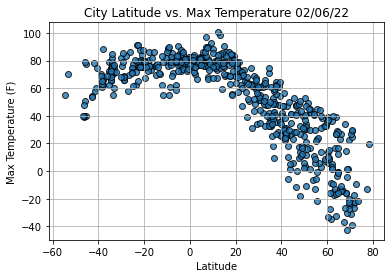

In [18]:
#Import time module
import time

#Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Citites")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

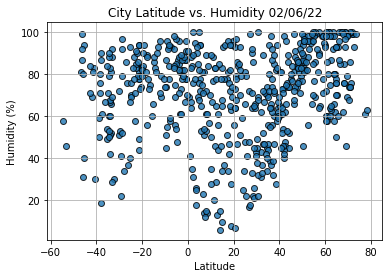

In [19]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

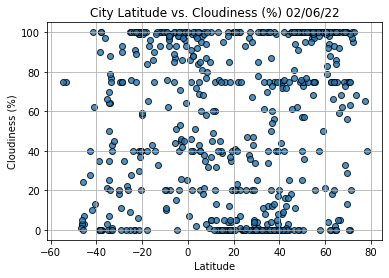

In [20]:
#Build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

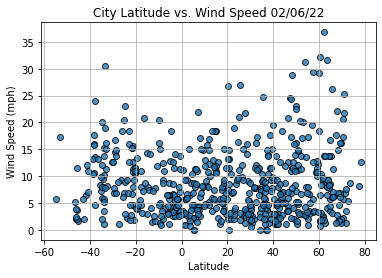

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                      Xinzhou
Country                        CN
Date          2022-02-06 17:23:14
Lat                       38.4092
Lng                       112.733
Max Temp                    28.08
Humidity                       28
Cloudiness                     99
Wind Speed                   1.21
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
567     True
568     True
569    False
570     True
571    False
Name: Lat, Length: 572, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Kabanjahe,ID,2022-02-06 17:23:11,3.1001,98.4908,66.96,95,100,2.30
4,Barrow,US,2022-02-06 17:18:47,71.2906,-156.7887,-23.78,76,20,6.91
5,Hammerfest,NO,2022-02-06 17:23:11,70.6634,23.6821,28.85,74,0,17.27
6,Teguldet,RU,2022-02-06 17:23:11,57.3064,88.1667,14.13,90,100,5.79
7,Kapaa,US,2022-02-06 17:21:39,22.0752,-159.3190,71.92,84,75,6.91
...,...,...,...,...,...,...,...,...,...
565,Tatawin,TN,2022-02-06 17:38:37,32.9297,10.4518,63.48,72,100,11.23
566,San Pedro,PH,2022-02-06 17:38:37,14.3500,121.0167,78.35,78,75,5.75
567,Decatur,US,2022-02-06 17:38:37,39.8403,-88.9548,34.32,69,0,19.57
568,Kungurtug,RU,2022-02-06 17:38:38,50.5994,97.5228,-10.91,96,36,1.70


In [29]:
#Create Northern and Southern Hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

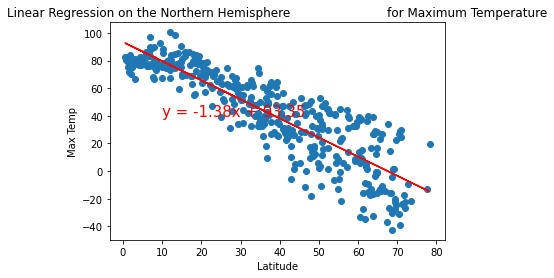

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

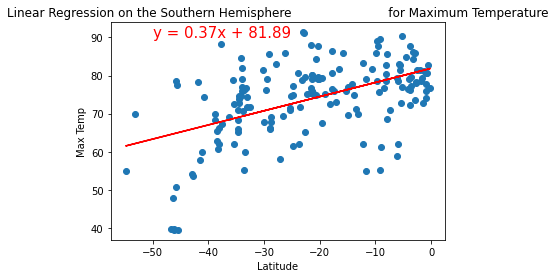

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

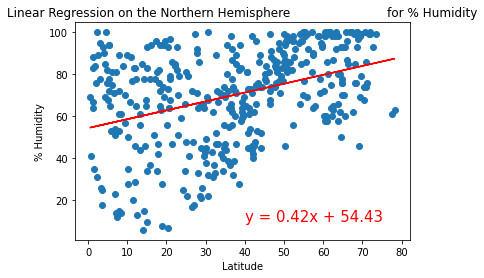

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

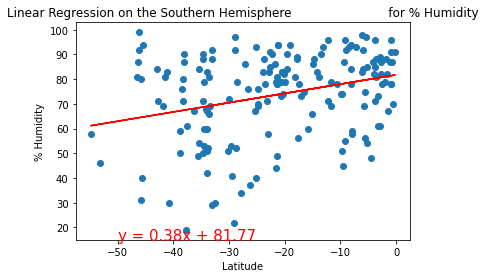

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

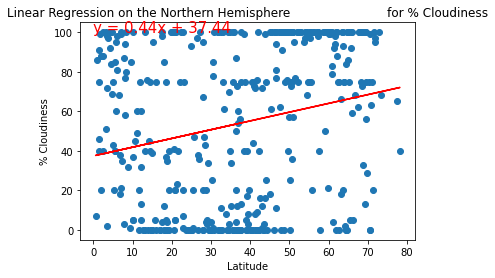

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,100))

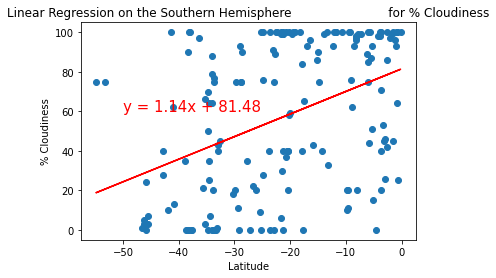

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

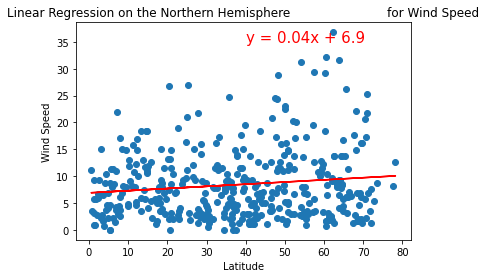

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

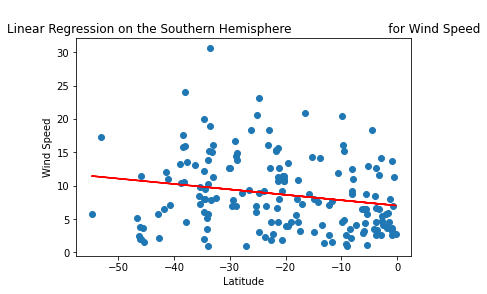

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))